In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

# Importation d'un ensemble de données

In [2]:
dataframe_fake = pd.read_csv("Fake.csv", nrows=6500)
dataframe_true = pd.read_csv("True.csv", nrows=6500)

In [3]:
dataframe_fake.iloc[14:,:8]

,title,text,subject,date
14,Heiress To Disney Empire Knows GOP Scammed Us...,Abigail Disney is an heiress with brass ovarie...,News,"December 20, 2017"
15,Tone Deaf Trump: Congrats Rep. Scalise On Los...,Donald Trump just signed the GOP tax scam into...,News,"December 20, 2017"
16,The Internet Brutally Mocks Disney’s New Trum...,A new animatronic figure in the Hall of Presid...,News,"December 19, 2017"
17,Mueller Spokesman Just F-cked Up Donald Trump...,Trump supporters and the so-called president s...,News,"December 17, 2017"
18,SNL Hilariously Mocks Accused Child Molester ...,"Right now, the whole world is looking at the s...",News,"December 17, 2017"
...,...,...,...,...
6495,Watch Dan Savage Destroy Ann Coulter For Her ...,Ann Coulter is one of those blatantly offensiv...,News,"May 7, 2016"
6496,Judge Lets Trump Postpone His Fraud Case Unti...,"Thanks to an absurd legal ruling, Donald Trump...",News,"May 7, 2016"
6497,Alabama’s Homophobic Chief Justice Roy Moore ...,Alabama Chief Justice Roy Moore is finally fac...,News,"May 7, 2016"
6498,American Airlines Throws Ivy League Economist...,Ivy League economist Guido Menzio has reported...,News,"May 7, 2016"


In [4]:
dataframe_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


# Insertion d'une colonne "classe" comme fonctionnalité cible

In [5]:
dataframe_fake["class"] = 0
dataframe_true["class"] = 1

In [6]:
dataframe_fake.shape, dataframe_true.shape

((6500, 5), (6500, 5))

# Combiner des Dataframes "Vrai" et "Faux"

In [7]:
dataframe_merge = pd.concat([dataframe_fake, dataframe_true], axis =0 )
dataframe_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [8]:
dataframe_merge.shape

(13000, 5)

In [9]:
dataframe_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

# Wordcloud

In [10]:
from IPython.display import set_matplotlib_formats
import matplotlib
from wordcloud import WordCloud

In [11]:
# Concaténation du texte de tous les articles
all_text = ' '.join(dataframe_merge['text'])

In [12]:
# Création du nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

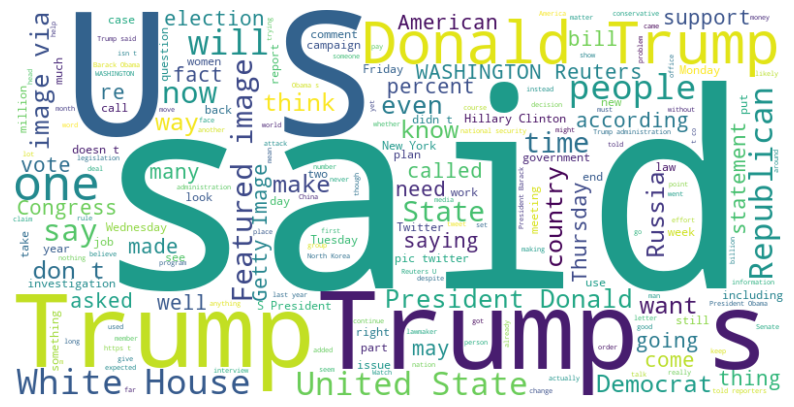

In [13]:
# Affichage du nuage de mots
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Supprimer les colonnes inutiles

In [14]:
dataframe = dataframe_merge.drop(["title", "subject","date"], axis = 1)

In [15]:
dataframe.isnull().sum()

text     0
class    0
dtype: int64

# Mélange aléatoire de la DataFrame

In [16]:
dataframe = dataframe.sample(frac = 1)

In [17]:
dataframe.head()

,text,class
6205,Full Frontal host Samantha Bee returned on Mon...,0
117,WASHINGTON (Reuters) - An organization establi...,1
5749,In the wake of the Orlando mass shooting Arizo...,0
5337,NEW YORK (Reuters) - A leading U.S. conservati...,1
2272,Donald Trump s surrogates are desperately tryi...,0


In [18]:
dataframe.reset_index(inplace = True)
dataframe.drop(["index"], axis = 1, inplace = True)

In [19]:
dataframe.columns

Index(['text', 'class'], dtype='object')

In [20]:
dataframe.head()

,text,class
0,Full Frontal host Samantha Bee returned on Mon...,0
1,WASHINGTON (Reuters) - An organization establi...,1
2,In the wake of the Orlando mass shooting Arizo...,0
3,NEW YORK (Reuters) - A leading U.S. conservati...,1
4,Donald Trump s surrogates are desperately tryi...,0


# Créer une fonction pour traiter les textes

In [21]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    text = re.sub('@', ' ', text)
    return text

In [22]:
dataframe["text"] = dataframe["text"].apply(wordopt)

In [23]:
dataframe.head()

,text,class
0,full frontal host samantha bee returned on mon...,0
1,washington reuters an organization establi...,1
2,in the wake of the orlando mass shooting arizo...,0
3,new york reuters a leading u s conservati...,1
4,donald trump s surrogates are desperately tryi...,0


# Définir des variables dépendantes et indépendantes

In [24]:
x = dataframe["text"]
y = dataframe["class"]

# Séparation de la Training et des tests

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# Convertir du texte en vecteurs

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

print(xv_train,xv_test)

  (0, 492)	0.13913407993005017
  (0, 22271)	0.11354724083766073
  (0, 1658)	0.05062225961398063
  (0, 21374)	0.03783554231563158
  (0, 45200)	0.07655649562308303
  (0, 12569)	0.07156294428691566
  (0, 20387)	0.2277386946238978
  (0, 174)	0.13572571908786218
  (0, 20067)	0.14170849908627434
  (0, 49378)	0.08618810444813137
  (0, 27783)	0.27424428878971535
  (0, 27659)	0.10859114151039378
  (0, 16571)	0.040946912519859886
  (0, 2164)	0.17256717718055942
  (0, 3709)	0.09415403404002427
  (0, 49606)	0.22190982024948527
  (0, 22638)	0.08626890082890086
  (0, 21008)	0.06183112703947436
  (0, 30142)	0.08929491258046356
  (0, 4717)	0.4157434840888193
  (0, 295)	0.09134560989131436
  (0, 7728)	0.39017905162449296
  (0, 37789)	0.17232657844952168
  (0, 44556)	0.07295006292608266
  (0, 46667)	0.1783032493297623
  :	:
  (9749, 31085)	0.12467541139755318
  (9749, 2268)	0.08090620060885226
  (9749, 142)	0.024627277397841922
  (9749, 2457)	0.1118376251779001
  (9749, 38083)	0.1380636103681741
  (9749

# KNN Algorithme

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


KNN = KNeighborsClassifier()
KNN.fit(xv_train, y_train)

KNeighborsClassifier()

In [28]:
pred_knn = KNN.predict(xv_test)

In [29]:
KNN.score(xv_test, y_test)

0.8476923076923077

In [30]:
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.95      0.74      0.83      1634
           1       0.78      0.96      0.86      1616

    accuracy                           0.85      3250
   macro avg       0.87      0.85      0.85      3250
weighted avg       0.87      0.85      0.85      3250



# SVM Algorithme

In [31]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

SVM = SVC(kernel='rbf')
SVM.fit(xv_train, y_train)

SVC()

In [32]:
pred_svm = SVM.predict(xv_test)

In [33]:
SVM.score(xv_test, y_test)

0.9975384615384615

In [34]:
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1634
           1       1.00      1.00      1.00      1616

    accuracy                           1.00      3250
   macro avg       1.00      1.00      1.00      3250
weighted avg       1.00      1.00      1.00      3250



# LLM

In [35]:
def output_label(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_KNN = KNN.predict(new_xv_test)
    pred_SVM = SVM.predict(new_xv_test)

    return print("\n\nSVM Prediction: {} \nKNN Prediction: {} ".format(output_label(pred_SVM[0]),output_label(pred_KNN[0])))

In [36]:
news = str(input())
manual_testing(news)

Media Links Domestic Drone Surveillance to Trump with ZERO Evidence 21st Century Wire says This is why nobody takes the mainstream media seriously Foreign Policy has released a new article hyping up the dangers of mass surveillance specifically talking about the relatively unknown National Geospatial Intelligence Agency It talks of the potential for drones to be able to track the movements of every person in a city and 90 of the article is solely concerned with generating fear Then in literally the final two paragraphs the author links the fear and problems which they have just spent the previous twelve paragraphs hyping up saying that Trump could use these systems against  innocent American citizens This is not journalism Stuart J Hooper examines the propaganda piece in the following video and also discusses which candidate Foreign Policy supported during the election Can you guess who it was READ MORE TRUMP NEWS AT 21st Century Wire Trump FilesSUPPORT 21WIRE  SUBSCRIBE BECOME A MEMBE

In [37]:
response_pred = None
def output_label(n):
    global response_pred
    if n == 0:
        response_pred = "This text is Fake News"
        return response_pred
    elif n == 1:
        response_pred = "This text is not a Fake News"
        return response_pred
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_SVM = SVM.predict(new_xv_test)
    return print("\n\n"'{} '"".format(output_label(pred_SVM[0])))

news = str(input())
manual_testing(news)

Media Links Domestic Drone Surveillance to Trump with ZERO Evidence 21st Century Wire says This is why nobody takes the mainstream media seriously Foreign Policy has released a new article hyping up the dangers of mass surveillance specifically talking about the relatively unknown National Geospatial Intelligence Agency It talks of the potential for drones to be able to track the movements of every person in a city and 90 of the article is solely concerned with generating fear Then in literally the final two paragraphs the author links the fear and problems which they have just spent the previous twelve paragraphs hyping up saying that Trump could use these systems against  innocent American citizens This is not journalism Stuart J Hooper examines the propaganda piece in the following video and also discusses which candidate Foreign Policy supported during the election Can you guess who it was READ MORE TRUMP NEWS AT 21st Century Wire Trump FilesSUPPORT 21WIRE  SUBSCRIBE BECOME A MEMBE

In [38]:
import openai

API_KEY = open("API_KEY","r").read()
openai.api_key = API_KEY

response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role":"user","content": news + response_pred + "because"}
    ]
)

assistant_response = response_pred + " because " + response['choices'][0]['message']['content']
print(assistant_response)

This text is Fake News because it includes unsubstantiated claims and attempts to generate fear without providing any evidence to support its claims. It also makes unfounded connections between domestic drone surveillance and President Trump without providing any evidence to support this assertion. Additionally, it promotes a biased and subjective viewpoint without presenting alternative perspectives or engaging in responsible journalism practices.
